In [1]:
import numpy as np
from numpy import array,matmul,arange,pi,exp
import matplotlib.pyplot as plt
from numpy.fft import fft
def row(x): return x.reshape(1,-1)
def col(x): return x.reshape(-1,1)
def plot(x):
  x=x.flatten()
  n=arange(len(x))
  plt.plot(n,x.real,x.imag)
def snr(a,b):
    n=sum(abs(a))
    d=sum(abs(a-b))
    return abs(20*np.log10(np.where(d == 0, 0, n/d)))

In [2]:
def computeFactors(n,factors):
    i = 2
    #factors = []
    while i * i <= n:
        if n % i:
            i += 1
        else:
            n = n//i
            factors.append(i)
    if n > 1:
        factors.append(n)
    return factors

def r235(n):
    factors=[]
    a=array(computeFactors(n,factors))
    return [sum(a==x) for x in (2,3,5)]

def r235fft(X):
    fft=np.fft.fft
    N=len(X)
    (R2,R3,R5)=r235(N)
    n=2**R2
    m=(3**R3)*(5**R5)
    V=X.reshape(n,m)

    A1=fft(V,axis=0)
    A2=A1*exp(-2j*pi*matmul(col(arange(n)),row(arange(m)))/N)
    A3=A2.reshape(n,3**R3,5**R5)
    A4=fft(A3,axis=1)
    for i in range(n):
        A4[i]=A4[i]*exp(-2j*pi*matmul(col(arange(3**R3)),row(arange(5**R5)))/m)
    Y=fft(A4,axis=2).T.flatten()
    return Y

In [3]:
n=1200
x=np.random.random([n])+np.random.random([n])*1j -.5-.5j
snr(fft(x),r235fft(x))

309.63741874896687

In [4]:
def r235fft(X):
    fft=np.fft.fft
    N=len(X)
    (R2,R3,R5)=r235(N)
    print(f'r2={R2}, r3={R3}, r5={R5}')
    n=2**R2
    m=(3**R3)*(5**R5)
    V=X.reshape(n,m)

    A1=fft(V,axis=0)
    A2=A1*exp(-2j*pi*matmul(col(arange(n)),row(arange(m)))/N)
    A3=A2.reshape(n,3**R3,5**R5)
    A4=fft(A3,axis=1)
    for i in range(n):
        A4[i]=A4[i]*exp(-2j*pi*matmul(col(arange(3**R3)),row(arange(5**R5)))/m)
    Y=fft(A4,axis=2).T.flatten()
    print(f'A1={A1.shape}, A2={A2.shape}, A3={A3.shape}, A4={A4.shape}')
    return Y

In [5]:
n=1200
x=np.random.random([n])+np.random.random([n])*1j -.5-.5j
snr(fft(x),r235fft(x))

r2=4, r3=1, r5=2
A1=(16, 75), A2=(16, 75), A3=(16, 3, 25), A4=(16, 3, 25)


309.44436132001306

In [6]:
matmul(col(arange(16)),row(arange(75)))

array([[   0,    0,    0, ...,    0,    0,    0],
       [   0,    1,    2, ...,   72,   73,   74],
       [   0,    2,    4, ...,  144,  146,  148],
       ...,
       [   0,   13,   26, ...,  936,  949,  962],
       [   0,   14,   28, ..., 1008, 1022, 1036],
       [   0,   15,   30, ..., 1080, 1095, 1110]])

In [12]:
x=array([[x]*5 for x in range (4)])
x

array([[0, 0, 0, 0, 0],
       [1, 1, 1, 1, 1],
       [2, 2, 2, 2, 2],
       [3, 3, 3, 3, 3]])

In [17]:
x0=fft(x,axis=0)
x0

array([[ 6.+0.j,  6.+0.j,  6.+0.j,  6.+0.j,  6.+0.j],
       [-2.+2.j, -2.+2.j, -2.+2.j, -2.+2.j, -2.+2.j],
       [-2.+0.j, -2.+0.j, -2.+0.j, -2.+0.j, -2.+0.j],
       [-2.-2.j, -2.-2.j, -2.-2.j, -2.-2.j, -2.-2.j]])

In [38]:
x1=x0*col(exp(-2j*pi*arange(4)/4))
x1

array([[6.+0.0000000e+00j, 6.+0.0000000e+00j, 6.+0.0000000e+00j,
        6.+0.0000000e+00j, 6.+0.0000000e+00j],
       [2.+2.0000000e+00j, 2.+2.0000000e+00j, 2.+2.0000000e+00j,
        2.+2.0000000e+00j, 2.+2.0000000e+00j],
       [2.+2.4492936e-16j, 2.+2.4492936e-16j, 2.+2.4492936e-16j,
        2.+2.4492936e-16j, 2.+2.4492936e-16j],
       [2.-2.0000000e+00j, 2.-2.0000000e+00j, 2.-2.0000000e+00j,
        2.-2.0000000e+00j, 2.-2.0000000e+00j]])

In [42]:
x2=fft(x1.T,axis=0)*exp(-2j*pi*arange(5)/20))
x2

array([[ 3.00000000e+01+0.00000000e+00j,  1.00000000e+01+1.00000000e+01j,
         1.00000000e+01+1.22464680e-15j,  1.00000000e+01-1.00000000e+01j],
       [ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j],
       [ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         1.44900252e-32+1.99438087e-32j, -3.10152403e-16-4.91233148e-17j],
       [ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         1.99438087e-32+1.44900252e-32j, -3.10152403e-16+4.91233148e-17j],
       [ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j]])

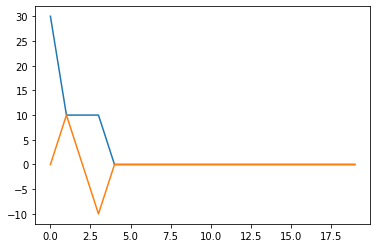

In [43]:
plot(x2.flatten())

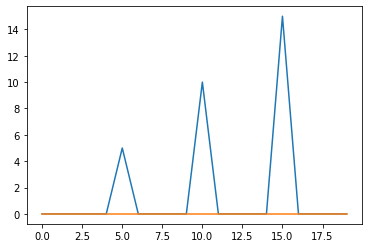

In [41]:
plot(fft(x))

In [68]:
X=np.zeros(1200,dtype=complex)
X=array([[l]*40 for l in range(30)],dtype=complex)
X=np.random.random([1200])+np.random.random([1200])*1j -.5-.5j
x=X.reshape((30,40))

a=fft(x,axis=0)
a=a*exp(-2j*pi*col(arange(30)).dot(row(arange(40)))/1200)
b=a.T
c=fft(b,axis=0)

In [70]:
snr(fft(X.flatten()),c.flatten())

309.03694804763296

In [75]:
X=array([[l]*40 for l in range(30)],dtype=complex)
x=X.reshape(30,40)
a=fft(x,axis=0)
a=a*exp(-2j*pi*col(arange(30)).dot(row(arange(40)))/1200)
b=a.T
c=fft(b,axis=0)

In [78]:
q=x[:,0].reshape(2,3,5)

In [79]:
q

array([[[ 0.+0.j,  1.+0.j,  2.+0.j,  3.+0.j,  4.+0.j],
        [ 5.+0.j,  6.+0.j,  7.+0.j,  8.+0.j,  9.+0.j],
        [10.+0.j, 11.+0.j, 12.+0.j, 13.+0.j, 14.+0.j]],

       [[15.+0.j, 16.+0.j, 17.+0.j, 18.+0.j, 19.+0.j],
        [20.+0.j, 21.+0.j, 22.+0.j, 23.+0.j, 24.+0.j],
        [25.+0.j, 26.+0.j, 27.+0.j, 28.+0.j, 29.+0.j]]])

In [84]:
q0=fft(q,axis=0);q0

array([[[ 15.+0.j,  17.+0.j,  19.+0.j,  21.+0.j,  23.+0.j],
        [ 25.+0.j,  27.+0.j,  29.+0.j,  31.+0.j,  33.+0.j],
        [ 35.+0.j,  37.+0.j,  39.+0.j,  41.+0.j,  43.+0.j]],

       [[-15.+0.j, -15.+0.j, -15.+0.j, -15.+0.j, -15.+0.j],
        [-15.+0.j, -15.+0.j, -15.+0.j, -15.+0.j, -15.+0.j],
        [-15.+0.j, -15.+0.j, -15.+0.j, -15.+0.j, -15.+0.j]]])

In [88]:
Wn_30=exp(-2j*pi*col(arange(2*3)).dot(row(arange(5)))/30).reshape(2,3,5)

In [93]:
q1=(q0*Wn_30); np.round(q1).flatten()

array([ 15. +0.j,  17. +0.j,  19. +0.j,  21. +0.j,  23. +0.j,  25. +0.j,
        26. -6.j,  26.-12.j,  25.-18.j,  22.-25.j,  35. +0.j,  34.-15.j,
        26.-29.j,  13.-39.j,  -4.-43.j, -15. +0.j, -12. +9.j,  -5.+14.j,
         5.+14.j,  12. +9.j, -15. +0.j, -10.+11.j,   2.+15.j,  12. +9.j,
        15. -3.j, -15. +0.j,  -8.+13.j,   7.+13.j,  15. +0.j,   8.-13.j])

In [95]:
q2=fft(q1,axis=1);q2

array([[[ 75.         +0.j        ,  77.21116715-20.66287145j,
          71.58891192-40.77801084j,  58.74922359-57.21465999j,
          40.58658609-67.28822074j],
        [-15.         +8.66025404j,  -4.93407951+16.73239984j,
           7.59016994+20.04543182j,  20.11444567+17.86010191j,
          30.00358385+10.62858986j],
        [-15.         -8.66025404j, -21.27708764 +3.93047161j,
         -22.17908186+20.73257902j, -15.86366927+39.35455808j,
          -1.59016994+56.65963089j]],

       [[-45.         +0.j        , -29.67221401+32.95433222j,
           4.43267203+42.17405723j,  31.77050983+23.08262653j,
          34.30746893 -7.29227763j],
        [  0.         +0.j        ,  -4.9630409  -1.05492691j,
          -7.5        +5.44906896j,  -1.29681814+12.33840037j,
           9.59829582+10.65998746j],
        [  0.         +0.j        ,  -1.77050983 -5.44906896j,
         -10.83843678 -4.82558296j, -16.56792695 +7.37651633j,
          -7.5       +23.08262653j]]])

In [105]:
q3=q2*exp(-2j*pi*col(arange(2*3)).dot(row(arange(5)))/15).reshape(2,3,5)

In [106]:
fft(q3,axis=2).flatten()

array([ 323.13588876-185.94376302j,   59.96030324  +9.72032795j,
         31.74982504 +31.55640827j,    8.20280419 +50.18864701j,
        -48.04882123 +94.47837979j,   37.90945683 -10.83576159j,
         11.52691756 +15.94417878j,   -1.51141596 +17.85578589j,
        -17.55085043 +17.95469282j, -105.37410798  +2.38237429j,
         22.36233635 -48.59403208j,   26.17712831  -9.37105906j,
         23.91027064  +8.96409062j,   17.34810739 +32.46297959j,
       -164.79784269 -26.76324925j,  -23.35815486 +32.05331708j,
        -32.0632674  +11.0108713j ,  -43.06193571 -12.20209929j,
       -122.35507881-121.78082744j,   -4.16156322 +90.91873835j,
          6.64184514  +6.57062389j,    2.36940463  +9.03731856j,
         -3.46363989 +15.32077465j,  -20.54760989 -35.5895043j ,
         15.          +4.6607872j ,   12.9367326   -0.38533554j,
         12.20378085 +10.27465192j,    0.85815486 +41.85534971j,
        -37.37479689 -40.33084856j,   11.37612859 -11.41381753j])

In [104]:
a[:,0]

array([435.+0.00000000e+00j, -15.+1.42715467e+02j, -15.+7.05694516e+01j,
       -15.+4.61652531e+01j, -15.+3.36905516e+01j, -15.+2.59807621e+01j,
       -15.+2.06457288e+01j, -15.+1.66591877e+01j, -15.+1.35060607e+01j,
       -15.+1.08981379e+01j, -15.+8.66025404e+00j, -15.+6.67843028e+00j,
       -15.+4.87379544e+00j, -15.+3.18834843e+00j, -15.+1.57656353e+00j,
       -15.+1.77635684e-15j, -15.-1.57656353e+00j, -15.-3.18834843e+00j,
       -15.-4.87379544e+00j, -15.-6.67843028e+00j, -15.-8.66025404e+00j,
       -15.-1.08981379e+01j, -15.-1.35060607e+01j, -15.-1.66591877e+01j,
       -15.-2.06457288e+01j, -15.-2.59807621e+01j, -15.-3.36905516e+01j,
       -15.-4.61652531e+01j, -15.-7.05694516e+01j, -15.-1.42715467e+02j])

In [108]:
v=arange(30).astype(complex)

In [109]:
fft(v)

array([435.+0.00000000e+00j, -15.+1.42715467e+02j, -15.+7.05694516e+01j,
       -15.+4.61652531e+01j, -15.+3.36905516e+01j, -15.+2.59807621e+01j,
       -15.+2.06457288e+01j, -15.+1.66591877e+01j, -15.+1.35060607e+01j,
       -15.+1.08981379e+01j, -15.+8.66025404e+00j, -15.+6.67843028e+00j,
       -15.+4.87379544e+00j, -15.+3.18834843e+00j, -15.+1.57656353e+00j,
       -15.+1.77635684e-15j, -15.-1.57656353e+00j, -15.-3.18834843e+00j,
       -15.-4.87379544e+00j, -15.-6.67843028e+00j, -15.-8.66025404e+00j,
       -15.-1.08981379e+01j, -15.-1.35060607e+01j, -15.-1.66591877e+01j,
       -15.-2.06457288e+01j, -15.-2.59807621e+01j, -15.-3.36905516e+01j,
       -15.-4.61652531e+01j, -15.-7.05694516e+01j, -15.-1.42715467e+02j])

In [111]:
v0=v.reshape(2,3,5); v0

array([[[ 0.+0.j,  1.+0.j,  2.+0.j,  3.+0.j,  4.+0.j],
        [ 5.+0.j,  6.+0.j,  7.+0.j,  8.+0.j,  9.+0.j],
        [10.+0.j, 11.+0.j, 12.+0.j, 13.+0.j, 14.+0.j]],

       [[15.+0.j, 16.+0.j, 17.+0.j, 18.+0.j, 19.+0.j],
        [20.+0.j, 21.+0.j, 22.+0.j, 23.+0.j, 24.+0.j],
        [25.+0.j, 26.+0.j, 27.+0.j, 28.+0.j, 29.+0.j]]])

In [112]:
v1=fft(v0,axis=0); v1

array([[[ 15.+0.j,  17.+0.j,  19.+0.j,  21.+0.j,  23.+0.j],
        [ 25.+0.j,  27.+0.j,  29.+0.j,  31.+0.j,  33.+0.j],
        [ 35.+0.j,  37.+0.j,  39.+0.j,  41.+0.j,  43.+0.j]],

       [[-15.+0.j, -15.+0.j, -15.+0.j, -15.+0.j, -15.+0.j],
        [-15.+0.j, -15.+0.j, -15.+0.j, -15.+0.j, -15.+0.j],
        [-15.+0.j, -15.+0.j, -15.+0.j, -15.+0.j, -15.+0.j]]])

In [121]:
w=exp(-2j*pi*col(arange(6)).dot(row(arange(5)))/30); w

array([[ 1.        +0.00000000e+00j,  1.        +0.00000000e+00j,
         1.        +0.00000000e+00j,  1.        +0.00000000e+00j,
         1.        +0.00000000e+00j],
       [ 1.        +0.00000000e+00j,  0.9781476 -2.07911691e-01j,
         0.91354546-4.06736643e-01j,  0.80901699-5.87785252e-01j,
         0.66913061-7.43144825e-01j],
       [ 1.        +0.00000000e+00j,  0.91354546-4.06736643e-01j,
         0.66913061-7.43144825e-01j,  0.30901699-9.51056516e-01j,
        -0.10452846-9.94521895e-01j],
       [ 1.        +0.00000000e+00j,  0.80901699-5.87785252e-01j,
         0.30901699-9.51056516e-01j, -0.30901699-9.51056516e-01j,
        -0.80901699-5.87785252e-01j],
       [ 1.        +0.00000000e+00j,  0.66913061-7.43144825e-01j,
        -0.10452846-9.94521895e-01j, -0.80901699-5.87785252e-01j,
        -0.9781476 +2.07911691e-01j],
       [ 1.        +0.00000000e+00j,  0.5       -8.66025404e-01j,
        -0.5       -8.66025404e-01j, -1.        -5.66553890e-16j,
        -0.5      

In [129]:
np.around(v1.reshape(6,5)*w).flatten()

array([ 15. +0.j,  17. +0.j,  19. +0.j,  21. +0.j,  23. +0.j,  25. +0.j,
        26. -6.j,  26.-12.j,  25.-18.j,  22.-25.j,  35. +0.j,  34.-15.j,
        26.-29.j,  13.-39.j,  -4.-43.j, -15. +0.j, -12. +9.j,  -5.+14.j,
         5.+14.j,  12. +9.j, -15. +0.j, -10.+11.j,   2.+15.j,  12. +9.j,
        15. -3.j, -15. +0.j,  -8.+13.j,   7.+13.j,  15. +0.j,   8.-13.j])

In [128]:
help(np.around)

Help on function around in module numpy:

around(a, decimals=0, out=None)
    Evenly round to the given number of decimals.
    
    Parameters
    ----------
    a : array_like
        Input data.
    decimals : int, optional
        Number of decimal places to round to (default: 0).  If
        decimals is negative, it specifies the number of positions to
        the left of the decimal point.
    out : ndarray, optional
        Alternative output array in which to place the result. It must have
        the same shape as the expected output, but the type of the output
        values will be cast if necessary. See :ref:`ufuncs-output-type` for more
        details.
    
    Returns
    -------
    rounded_array : ndarray
        An array of the same type as `a`, containing the rounded values.
        Unless `out` was specified, a new array is created.  A reference to
        the result is returned.
    
        The real and imaginary parts of complex numbers are rounded
        separa